# **Project "*Medical Insurance Cost Prediction*"**


# **1. Overview**





### The medical insurance is one of the most important issues of any society. Therefore, the costs associated with this is very critical in any familiar budget. In this project, we´ll be dealing with two main questions:

### **--->** What are the primary factors influencing medical insurance expenses?

### **--->** How accurate is the Linear Regression machine learning technique in predicting medical expenses?

## *Core Question*

### **What is the estimated cost of a Medical Insurance?**


# **2. Preprocessing**

In [ ]:
# data and array managament
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
import missingno as msno

# sckikit-learn libraries
import sklearn
from sklearn import preprocessing
#from sklearn import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
# here we load the data from the source using pandas

insurance_df = pd.read_csv("medical_insurance.csv")

insurance_df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [ ]:
insurance_df['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
2767     8569.86180
2768     2020.17700
2769    16450.89470
2770    21595.38229
2771     9850.43200
Name: charges, Length: 2772, dtype: float64

### Here, we have the first contact with the dataset and we can see it has 7 columns, 3 of them contains no numerical values.

In [ ]:
insurance_df.count()

age         2772
sex         2772
bmi         2772
children    2772
smoker      2772
region      2772
charges     2772
dtype: int64

### We can see that there are 2772 registers in the dataset.

### **2.1 Data Cleaning**

<Axes: >

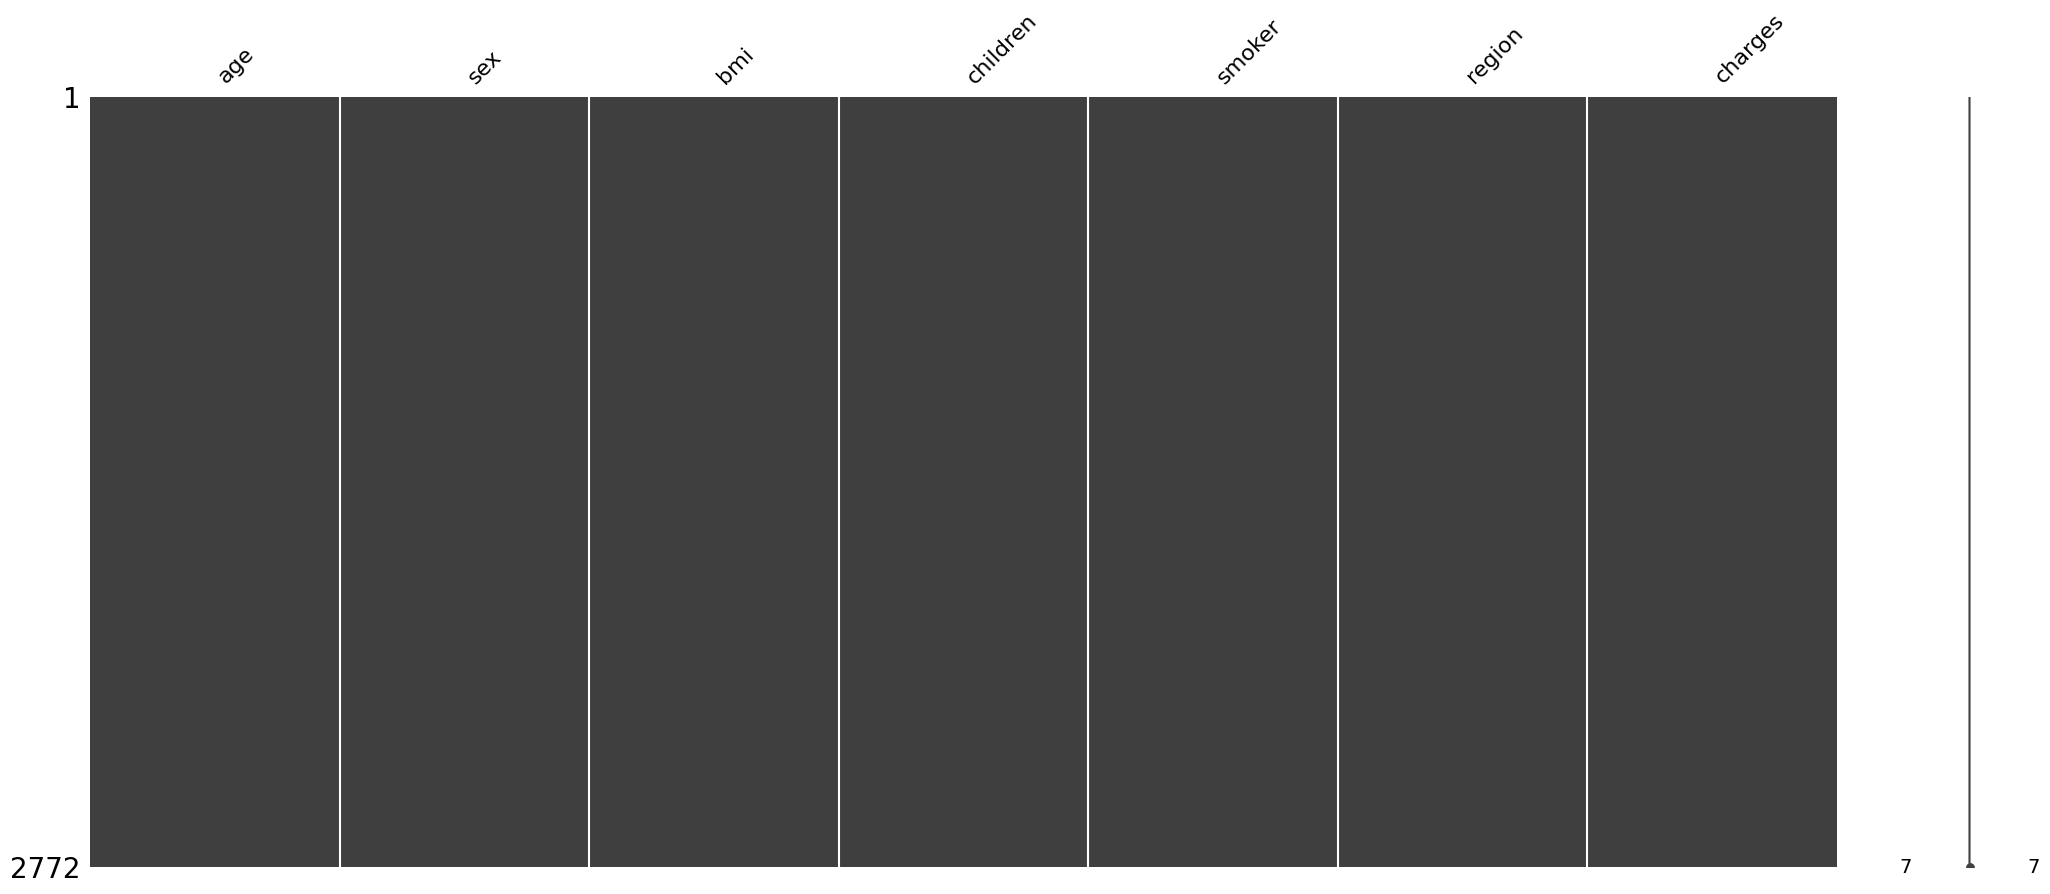

In [ ]:
# here, we use this matrix to the null values
msno.matrix(insurance_df)

### We can se from the previous plot that there are no null/missing values. We´ll confirm this in the next cell.

In [ ]:
# here, we can see the number of null values per column in the test dataset
n_nulls_test = insurance_df.isnull().sum()
print("The number of null values per attribute is:")
n_nulls_test

The number of null values per attribute is:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Here we can see there are no null values.

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### From the previous table we can see that there are no null/missing values in the dataset. There are three categorical variables which we must treat in the *Data Coding* section ahead. Besides, we have seven columns including the label (charges) which is the variable that we want to predict. Now, we´ll treat the duplicated values in the dataset.

In [ ]:
# drop duplicates

insurance_df = insurance_df.drop_duplicates()
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### We can see that there were 1435 duplicated registers.

In [ ]:
insurance_df.describe()

age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010

### **2.2 Data Coding**

#### In this part, we´ll perform some ***data coding***.

In [ ]:
insurance_df.head(5)

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

### We can see there are three non-numerical variables: *sex,smoker and region*. We´ll "code" them.

In [ ]:
# sex

encoder = preprocessing.LabelEncoder()

insurance_df['sex']= encoder.fit_transform(insurance_df['sex'])

insurance_df['sex']

0       0
1       1
2       1
3       1
4       1
       ..
2767    0
2768    0
2769    1
2770    1
2771    1
Name: sex, Length: 2772, dtype: int32

In [ ]:
# smoker

encoder = preprocessing.LabelEncoder()

insurance_df['smoker']= encoder.fit_transform(insurance_df['smoker'])

insurance_df['smoker']

0       1
1       0
2       0
3       0
4       0
       ..
2767    0
2768    0
2769    1
2770    0
2771    0
Name: smoker, Length: 2772, dtype: int32

In [ ]:
# region

encoder = preprocessing.LabelEncoder()

insurance_df['region']= encoder.fit_transform(insurance_df['region'])

insurance_df['region']

0       3
1       2
2       2
3       1
4       1
       ..
2767    2
2768    3
2769    1
2770    1
2771    3
Name: region, Length: 2772, dtype: int32

#### Now, we´ve done the *data coding* we can take a glance at how the dataset looks like right now.

In [ ]:
insurance_df.head(5)

age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520

#### We can see there are no categorical (non-numerical) values.

# **3. Data Visualization (Exploratory Data Analysis)**

### **3.1 Data Balancing**

### **3.2 Visualization**

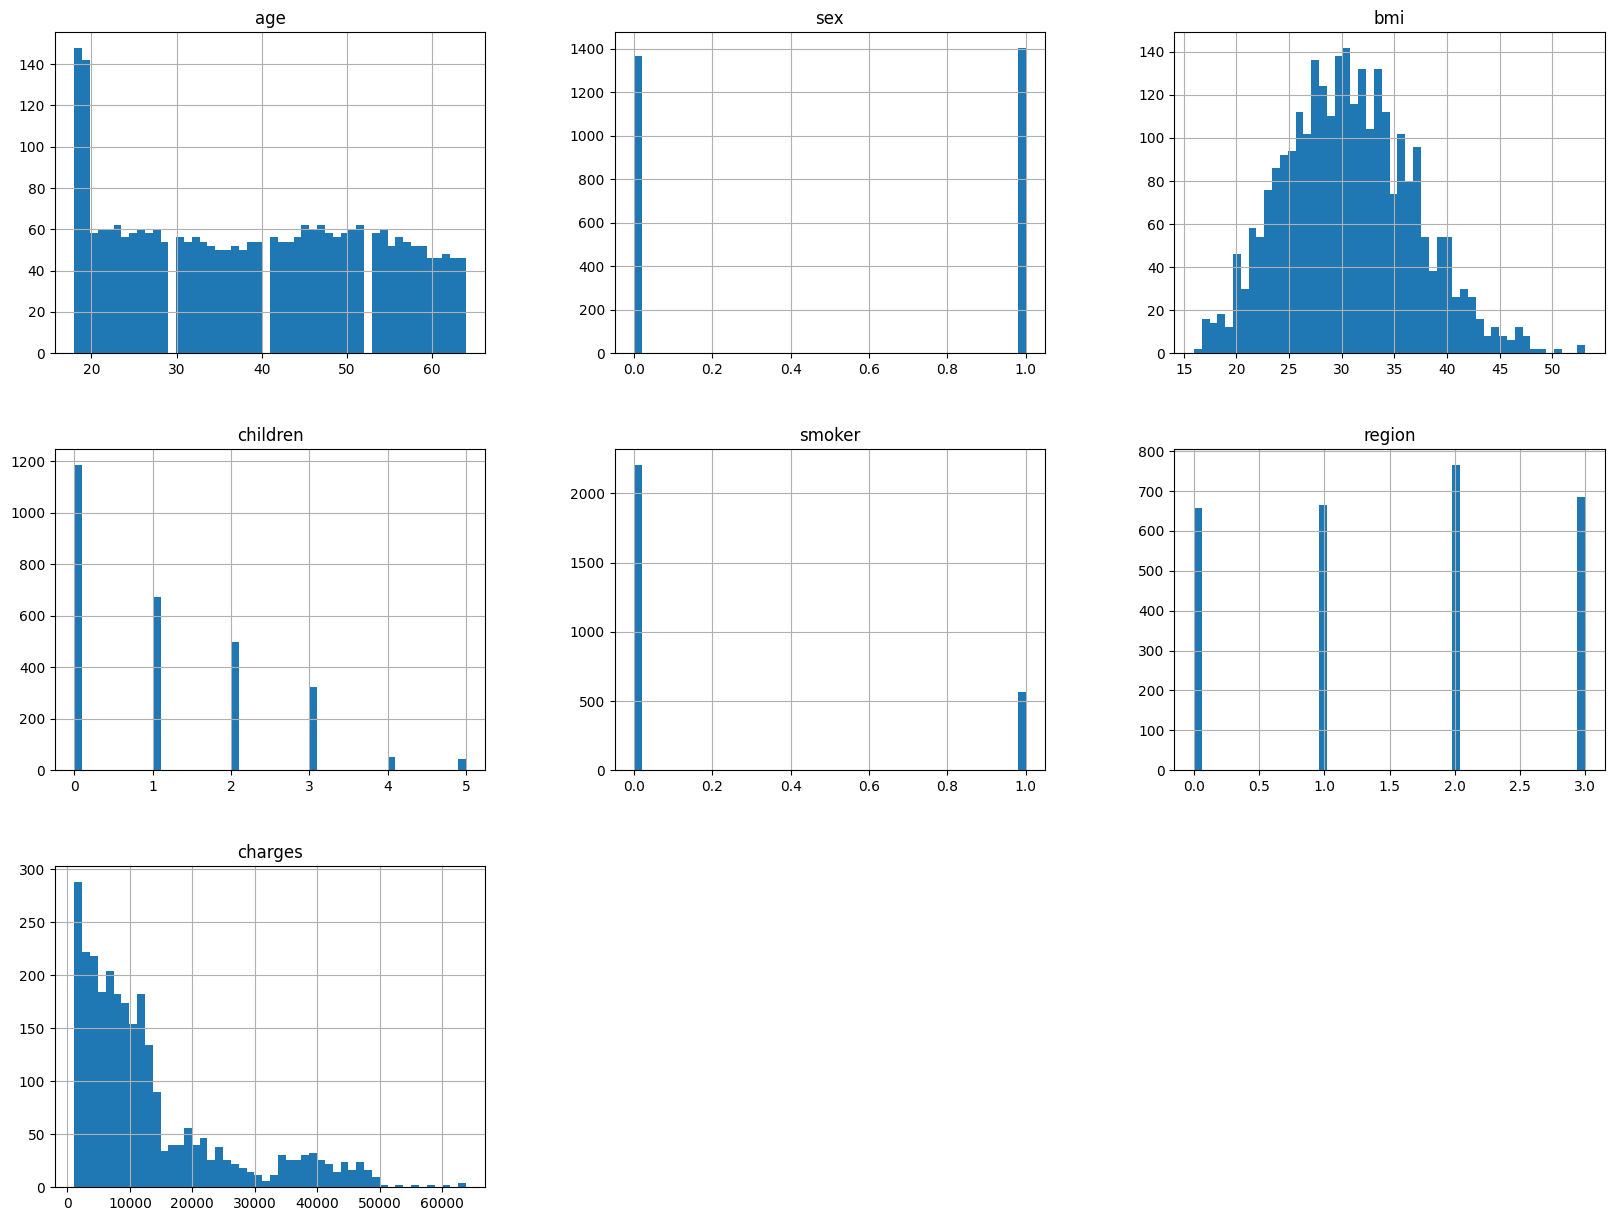

In [ ]:
# we´ll plot the numerical features of the dataset.

insurance_df.hist(bins=50, figsize=(20,15))
plt.show()

#### There are some **insights** we could extract from here:
* More than the half part of the dataset are charged between $0 and $15.000
* The number of smokers are more than five times the number of no smokers.
* The number of males and females are equal.
* The regions are distributed uniformly.
* The majority of the people do not have any children.
* The BMI (*Body Mass Index*) of the most of them are between 25 and 35.
* The range of ages are "balanced" because the disctribution is uniform between 20 and 60.


#### Now, let´s take a look at the other library: Seaborn.

In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

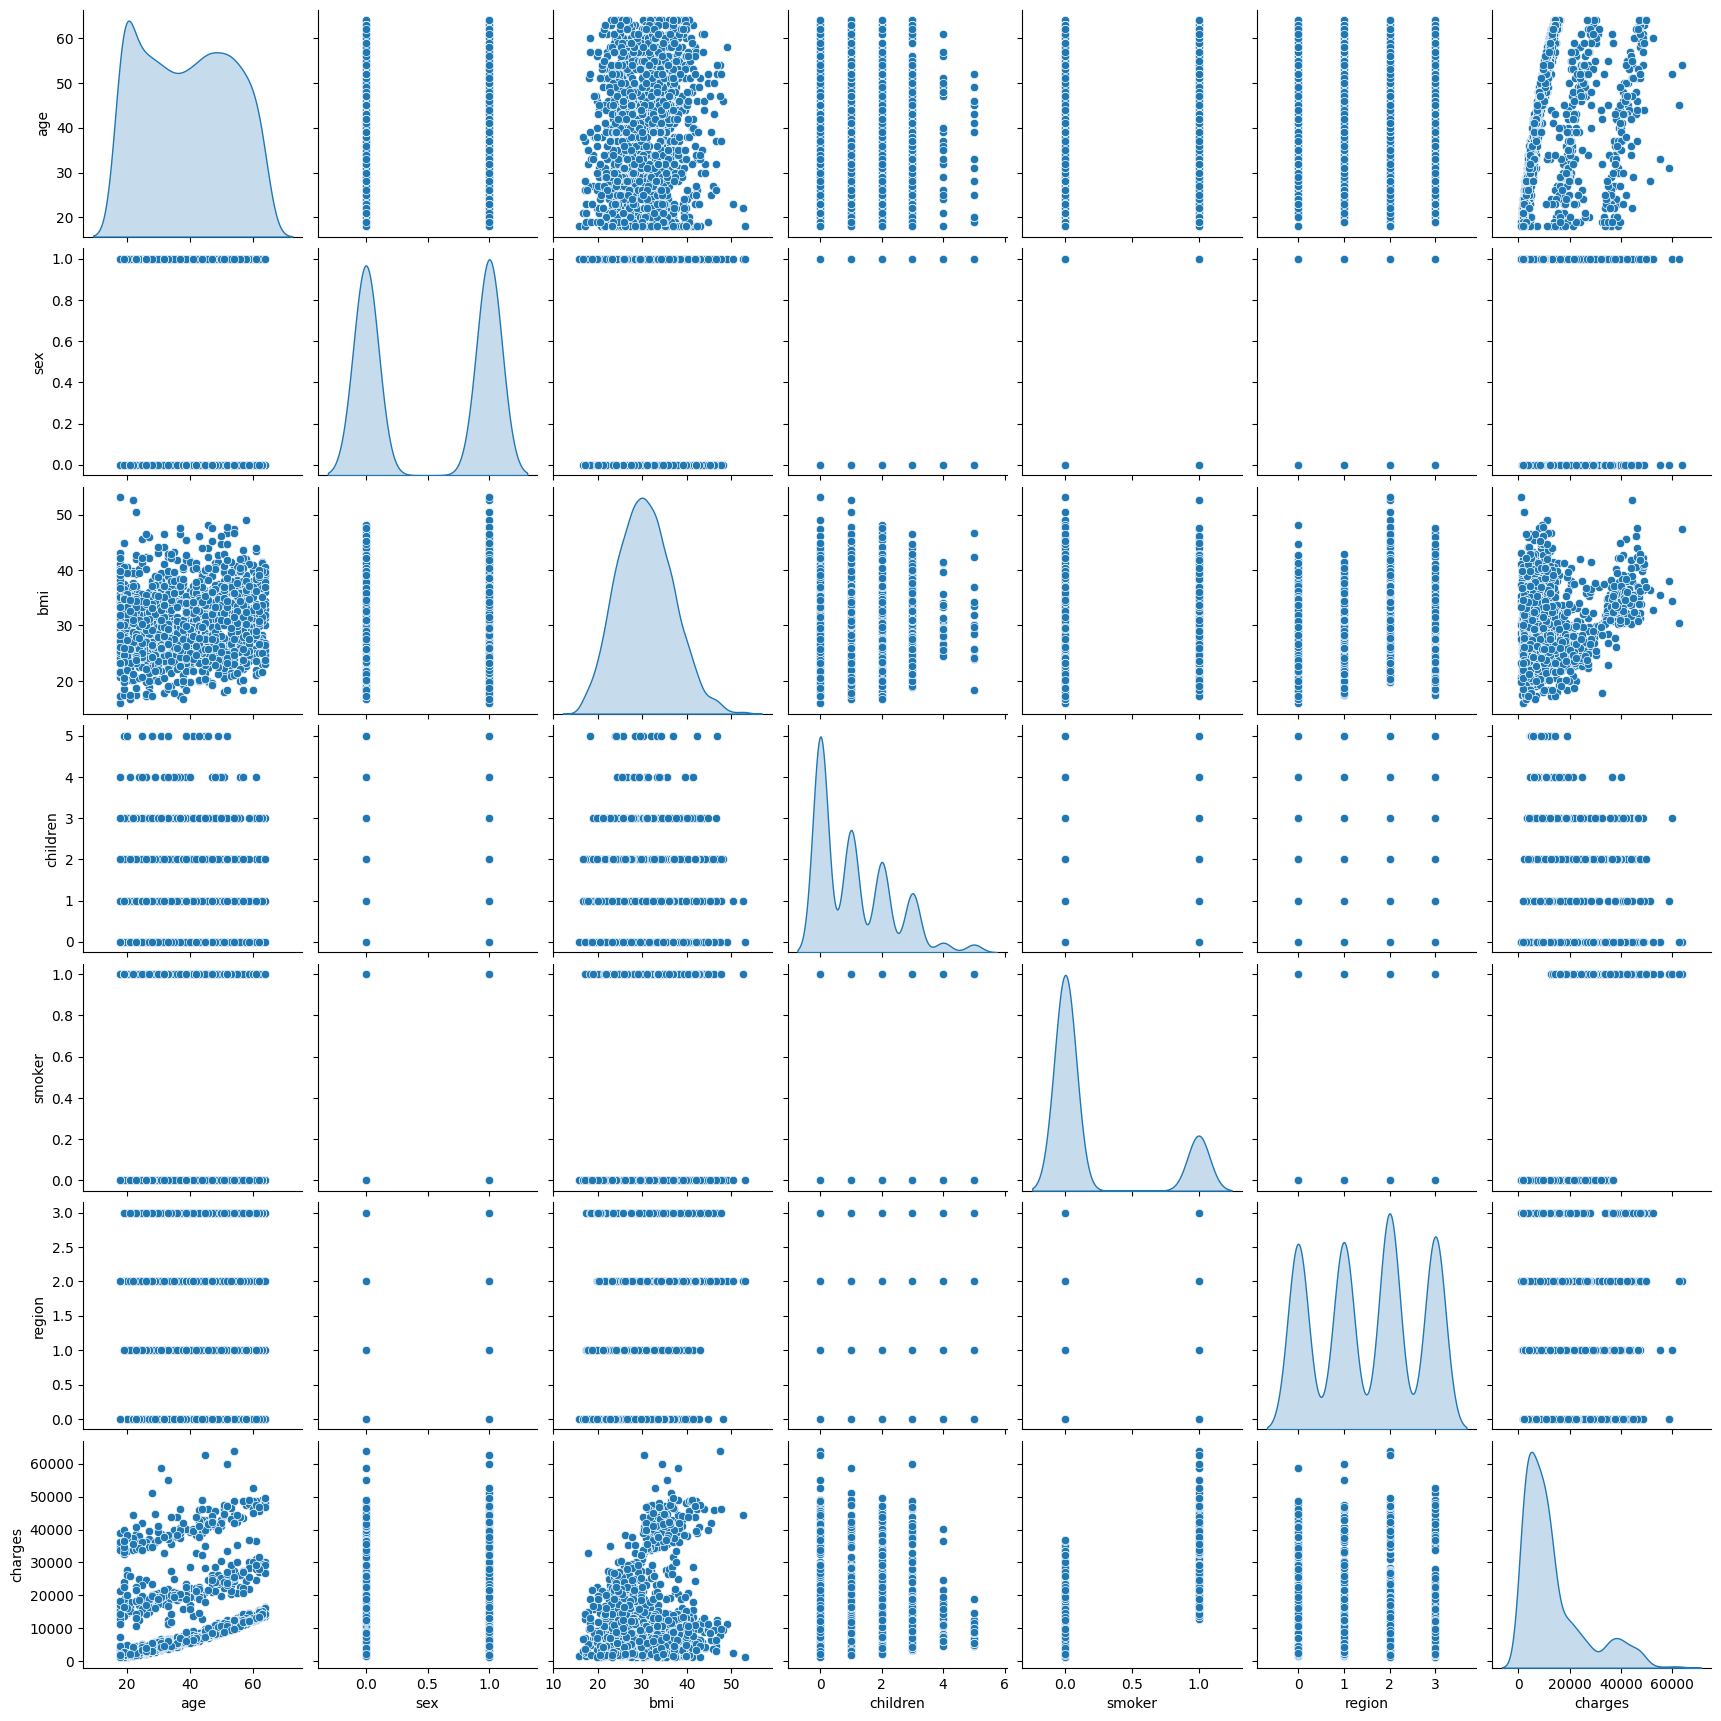

In [ ]:
sb.pairplot(insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], diag_kind='kde')

#### We can obtain the same insights from these than the used previously, just looking at the "diagonal" plots. Let´s try using another feature of **Seaborn**.

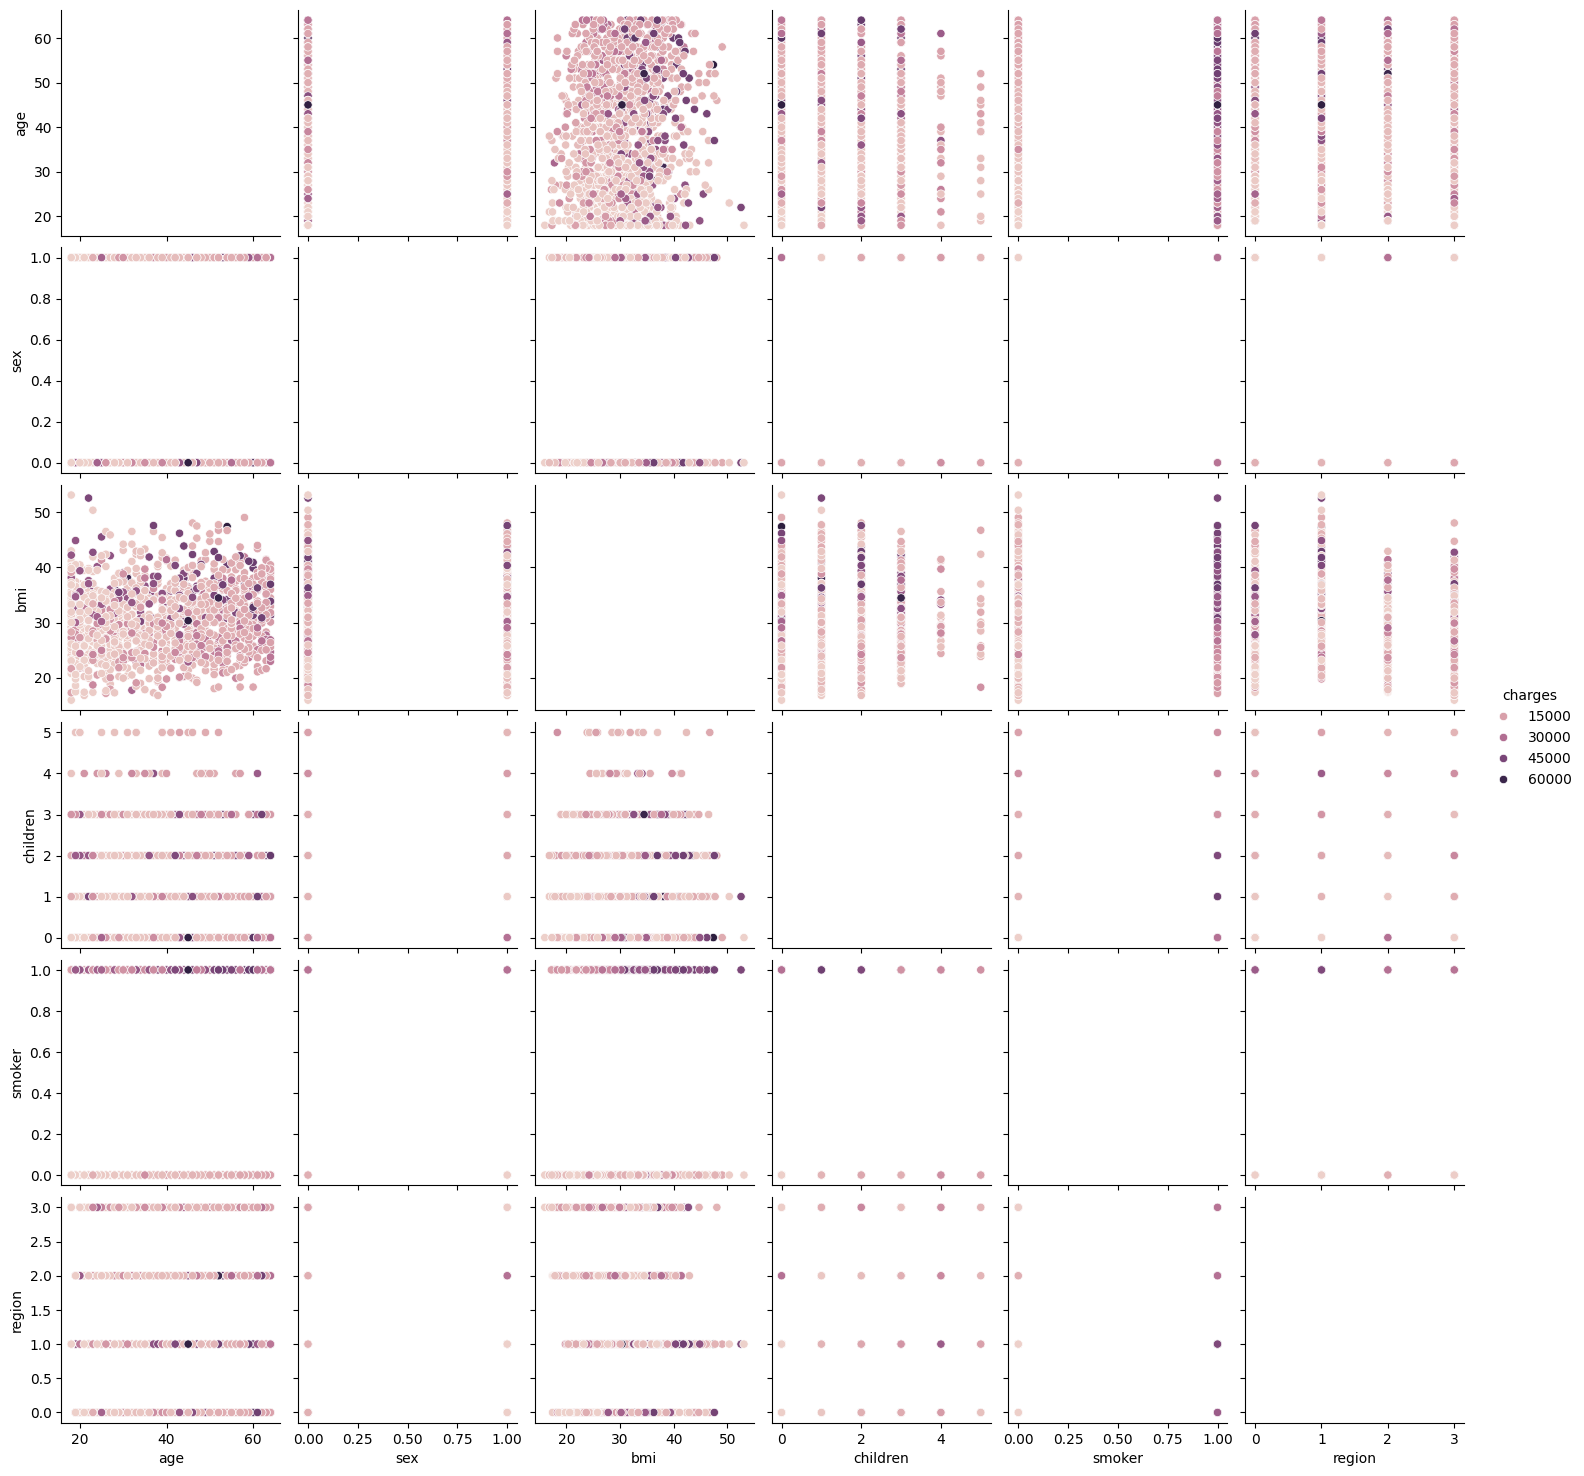

In [ ]:
sb.pairplot(insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']], hue='charges', diag_kind='kde')

### Let´s plot other plots.

<Axes: xlabel='charges', ylabel='Count'>

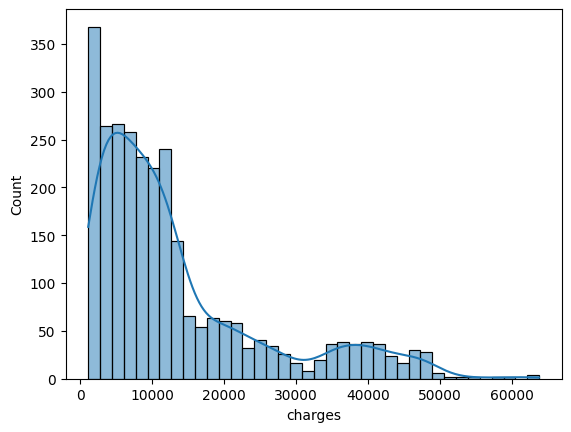

In [ ]:
sb.histplot(data=insurance_df,x='charges', kde=True)

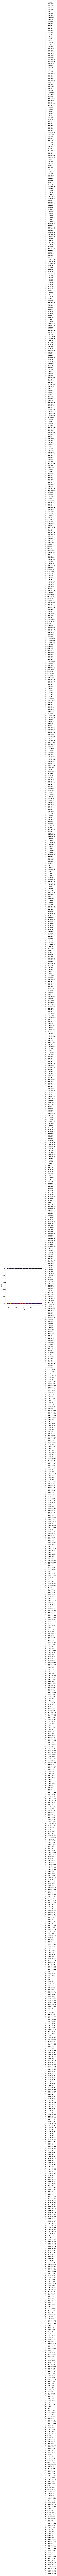

In [ ]:
sb.lmplot(x="age", y="smoker", hue="charges", data=insurance_df, palette = 'inferno_r')

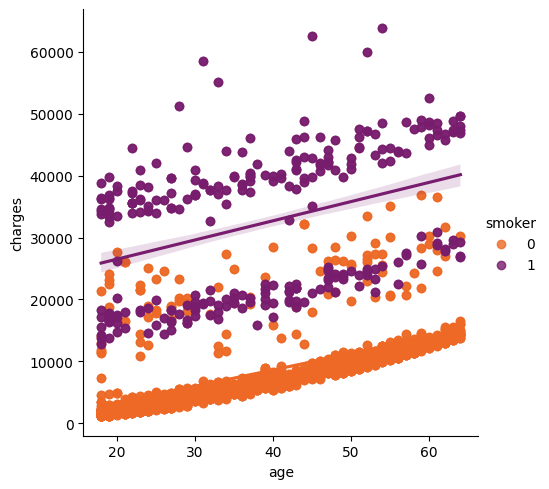

In [ ]:
sb.lmplot(x="age", y="charges", hue="smoker", data=insurance_df, palette = 'inferno_r')

#### On the other hand, there is no direct relation between the variables, at least in a first sight. We need to do further analysis with the Pearson´s correlation and the heat map with all the variables.

<Axes: >

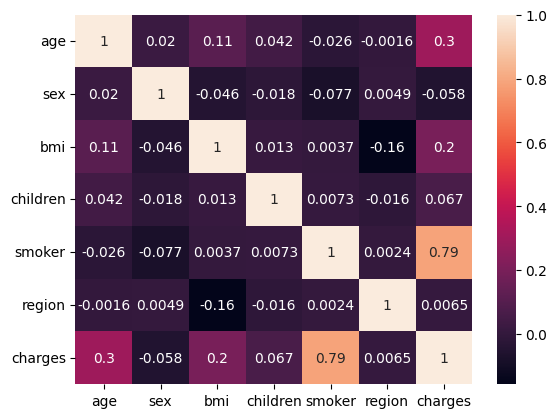

In [ ]:
sb.heatmap(insurance_df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']].corr(),annot = True)

#### From the Perason´s correlation we can see that the variables that are more related are "smoker" (feature) and "charges" (labels) with a number of 0,79 (the maximum possible value is 1). Moreover, we can see the correlation of all the variables with the target ('charges').

In [ ]:
corr_matrix = insurance_df.corr()
corr_matrix

age       sex       bmi  children    smoker    region   charges
age       1.000000  0.019814  0.109344  0.041536 -0.025587 -0.001626  0.298308
sex       0.019814  1.000000 -0.046397 -0.017848 -0.076596  0.004936 -0.058044
bmi       0.109344 -0.046397  1.000000  0.012755  0.003746 -0.157574  0.198401
children  0.041536 -0.017848  0.012755  1.000000  0.007331 -0.016258  0.067389
smoker   -0.025587 -0.076596  0.003746  0.007331  1.000000  0.002358  0.787234
region   -0.001626  0.004936 -0.157574 -0.016258  0.002358  1.000000  0.006547
charges   0.298308 -0.058044  0.198401  0.067389  0.787234  0.006547  1.000000

#### Moreover, we can see the correlation of all the variables with the label ('charges').

In [ ]:
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
region      0.006547
sex        -0.058044
Name: charges, dtype: float64

#### Once again, we see the closest relation is between smoker and charges. This will be useful for the selection of the attributes.

### **3.3 Selection of the attributes**

In [ ]:
X = insurance_df['smoker']   ## X

Y = insurance_df['charges']   ## Y

In [ ]:
X.shape

(2772,)

In [ ]:
Y.shape

(2772,)

In [ ]:
X_smoker = np.array(X).reshape(-1,1)
Y_charges = np.array(Y).reshape(-1,1)

print(X_smoker.shape)
print(Y_charges.shape)

(2772, 1)
(2772, 1)


###  **3.4 Train/Test/Val split**

In [ ]:
X_train,X_val, Y_train, Y_val = train_test_split(X_smoker,Y_charges, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(2217, 1)
(555, 1)
(2217, 1)
(555, 1)


### **3.5 Scaler**

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       ...,
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903]])

In [ ]:
Y_train

array([[13063.883  ],
       [10231.4999 ],
       [48673.5588 ],
       ...,
       [22218.1149 ],
       [20878.78443],
       [ 6474.013  ]])

In [ ]:
X_val = scaler.transform(X_val)

In [ ]:
X_val

array([[ 2.02110425],
       [ 2.02110425],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [ 2.02110425],
       [ 2.02110425],
       [ 2.02110425],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0.49477903],
       [-0.49477903],
       [-0.49477903],
       [ 2.02110425],
       [-0

# **4. Training of the model (Linear Regression)**

### **4.1 Training the model**

In [ ]:
# here, we fix the model as Linear Regression

model = sklearn.linear_model.LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
print(Y_train)

[[13063.883  ]
 [10231.4999 ]
 [48673.5588 ]
 ...
 [22218.1149 ]
 [20878.78443]
 [ 6474.013  ]]


In [ ]:
X_val

array([[-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [ 1.9543708 ],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [ 1.9543708 ],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [ 1.9543708 ],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [ 1.9543708 ],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [ 1.9543708 ],
       [ 1.9543708 ],
       [ 1.9543708 ],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0.51167363],
       [-0

### **4.2 Predictions of the model**

In [ ]:
print(X_val.shape)
Y_pred = model.predict(X_val)
print(Y_pred.shape)
print(Y_pred)

(555, 1)
(555, 1)
[[32023.59479181]
 [32023.59479181]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [32023.59479181]
 [32023.59479181]
 [32023.59479181]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [ 8550.42201382]
 [32023.59479181]
 [ 8550.42

In [ ]:
list_of_predictions = pd.DataFrame(Y_pred)

In [ ]:
list_of_predictions.head(5)

0
0  32023.594792
1  32023.594792
2   8550.422014
3  32023.594792
4   8550.422014

### **4.3 Evaluation of the model**

### In the **Linear Regression** machine learning algorithm, we use *metrics* to calculate an error score to summarize the predictive skill of a model. There are several sort of errors we could use, for instance,

**---->** *Mean Squared Error*

**---->** *Root Mean Squared Error*

**---->** *Mean Absolute Error*

#### **4.3.1** ***Mean Squared Error***

In [ ]:
# here, we´ll use the library of SciKit Learn
Y_pred


array([[32023.59479181],
       [32023.59479181],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [32023.59479181],
       [32023.59479181],
       [32023.59479181],
       [ 8550.42201382],
       [32023.59479181],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],
       [ 8550.42201382],


In [ ]:
Y_val

array([[46200.9851 ],
       [22412.6485 ],
       [ 3172.018  ],
       [16776.30405],
       [ 8932.084  ],
       [ 6781.3542 ],
       [ 4391.652  ],
       [36397.576  ],
       [ 2459.7201 ],
       [19361.9988 ],
       [12592.5345 ],
       [ 5438.7491 ],
       [ 2498.4144 ],
       [11326.71487],
       [ 4830.63   ],
       [11289.10925],
       [ 4931.647  ],
       [30184.9367 ],
       [ 3987.926  ],
       [10096.97   ],
       [ 2362.22905],
       [14256.1928 ],
       [ 5312.16985],
       [ 8116.26885],
       [41097.16175],
       [ 2302.3    ],
       [ 3260.199  ],
       [39611.7577 ],
       [11013.7119 ],
       [34617.84065],
       [38711.     ],
       [41949.2441 ],
       [13405.3903 ],
       [34439.8559 ],
       [ 2395.17155],
       [ 9182.17   ],
       [ 9504.3103 ],
       [ 2150.469  ],
       [13616.3586 ],
       [ 6457.8434 ],
       [44400.4064 ],
       [24915.04626],
       [ 6664.68595],
       [10107.2206 ],
       [60021.39897],
       [ 5

In [ ]:
errors = sklearn.metrics.mean_squared_error(Y_val,Y_pred)

In [ ]:
type(errors)

numpy.float64

In [ ]:
errors

51880418.95520501

In [ ]:
errors = sklearn.metrics.mean_absolute_error(Y_val,Y_pred)

In [ ]:
errors

5635.46566573373

#### It means that there is an error of $5.635 in a bandwidth of almost $60.000

In [ ]:
x = model.score(Y_val,Y_pred)